In [1]:
import os
import json
import string
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing.evaluate_sparsity_regimes import missing_patterns, synthesize_and_plot_results

In [27]:
def plot_dist(data: pd.DataFrame, data_missing: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('missing')
    sns.scatterplot(x='x', y='y', data=data, ax=ax1, color=sns.color_palette()[0])
    sns.scatterplot(x='x', y='y', data=data_missing, ax=ax2, color=sns.color_palette()[1])
    plt.show()
    
def plot_heatmap(data1: pd.DataFrame, data2: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('synth')
    
    crosstab1 = pd.crosstab(data1['x'], columns=[data1['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab1, vmin=0.0, vmax=1.0, ax=ax1)
    
    crosstab2 = pd.crosstab(data2['x'], columns=[data2['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab2, vmin=0.0, vmax=1.0, ax=ax2)
            

In [15]:
from synthesized.testing import UtilityTesting
from synthesized import HighDimSynthesizer

from scipy.stats import ks_2samp


# Uniform Distribution

Plot how the distributions are affected by each of the sparsity regimes

============= MCAR =============
Prop. NaNs:
x    0.4965
dtype: float64


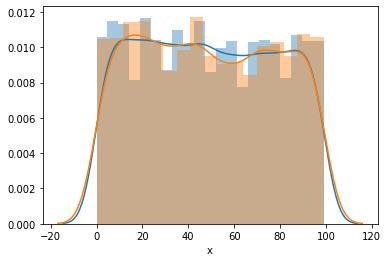

============= MNAR =============
Prop. NaNs:
x    0.5
dtype: float64


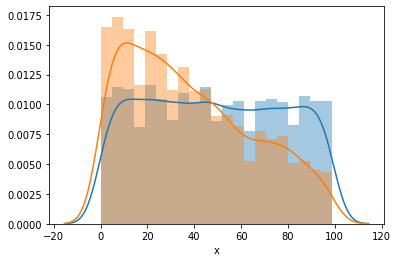

In [16]:
data = syn_dist.create_uniform_categorical(n_classes=100, size=10000)

keep_ratio = 0.5
std_noise = 2.

# MCAR
print('============= MCAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MCAR')

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )

sns.distplot(data['x'], color=sns.color_palette()[0])
sns.distplot(data_missing['x'].dropna(), color=sns.color_palette()[1])
plt.show()


# MNAR
print('============= MNAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MNAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )

sns.distplot(data['x'], color=sns.color_palette()[0])
sns.distplot(data_missing['x'].dropna(), color=sns.color_palette()[1])
plt.show()

For each of the regimes, evaluate different synthesized models for distinct proportions of Nans

Computed results for 75% NaNs for MCAR. Took 213.64s.
Computed results for 70% NaNs for MCAR. Took 186.66s.
Computed results for 65% NaNs for MCAR. Took 180.55s.
Computed results for 60% NaNs for MCAR. Took 180.67s.
Computed results for 55% NaNs for MCAR. Took 179.99s.
Computed results for 50% NaNs for MCAR. Took 179.40s.
Computed results for 45% NaNs for MCAR. Took 179.35s.
Computed results for 40% NaNs for MCAR. Took 179.37s.
Computed results for 35% NaNs for MCAR. Took 178.97s.
Computed results for 30% NaNs for MCAR. Took 179.99s.
Computed results for 25% NaNs for MCAR. Took 179.73s.
Computed results for 20% NaNs for MCAR. Took 178.68s.
Computed results for 15% NaNs for MCAR. Took 189.39s.
Computed results for 10% NaNs for MCAR. Took 201.43s.
Computed results for 5% NaNs for MCAR. Took 202.92s.
Computed results for 0% NaNs for MCAR. Took 56.50s.


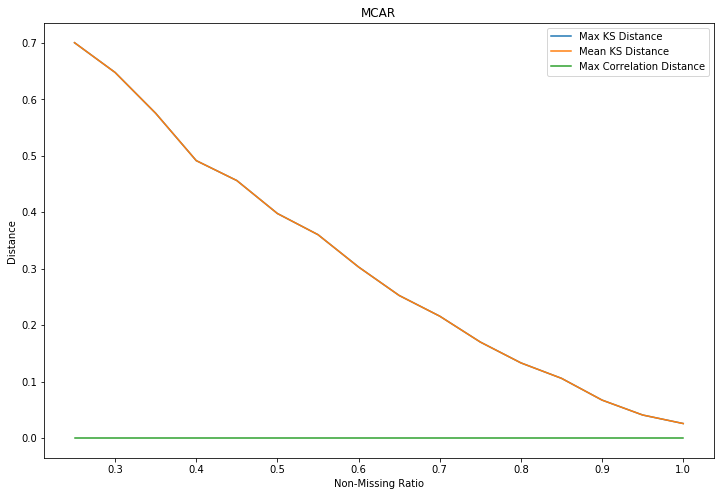

Computed results for 75% NaNs for MNAR. Took 182.20s.
Computed results for 70% NaNs for MNAR. Took 193.19s.
Computed results for 65% NaNs for MNAR. Took 196.47s.
Computed results for 60% NaNs for MNAR. Took 198.39s.
Computed results for 55% NaNs for MNAR. Took 203.98s.
Computed results for 50% NaNs for MNAR. Took 179.91s.
Computed results for 45% NaNs for MNAR. Took 177.64s.
Computed results for 40% NaNs for MNAR. Took 216.68s.
Computed results for 35% NaNs for MNAR. Took 233.79s.
Computed results for 30% NaNs for MNAR. Took 186.17s.
Computed results for 25% NaNs for MNAR. Took 221.34s.
Computed results for 20% NaNs for MNAR. Took 215.05s.
Computed results for 15% NaNs for MNAR. Took 257.71s.
Computed results for 10% NaNs for MNAR. Took 210.97s.
Computed results for 5% NaNs for MNAR. Took 234.05s.
Computed results for 0% NaNs for MNAR. Took 243.54s.


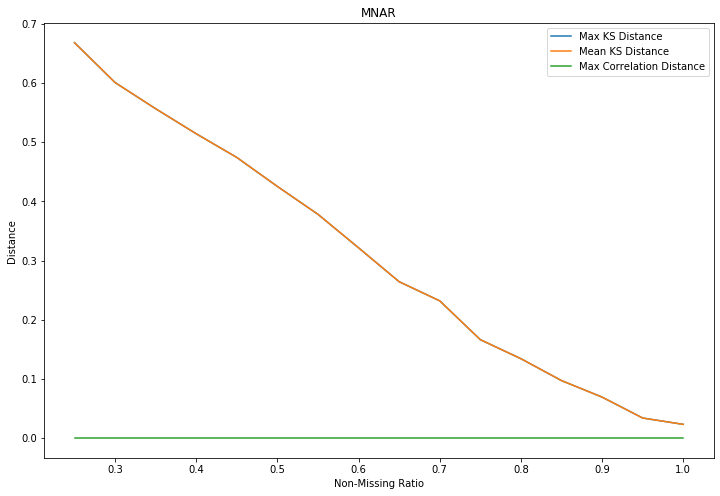

In [19]:
results = dict()
for mechanism in ['MCAR', 'MNAR']:
    results[mechanism] = synthesize_and_plot_results(
        data, mechanism, n_iter=2500, std_noise = 2., start=25, end=100, step=5, n_experiments=3
    )


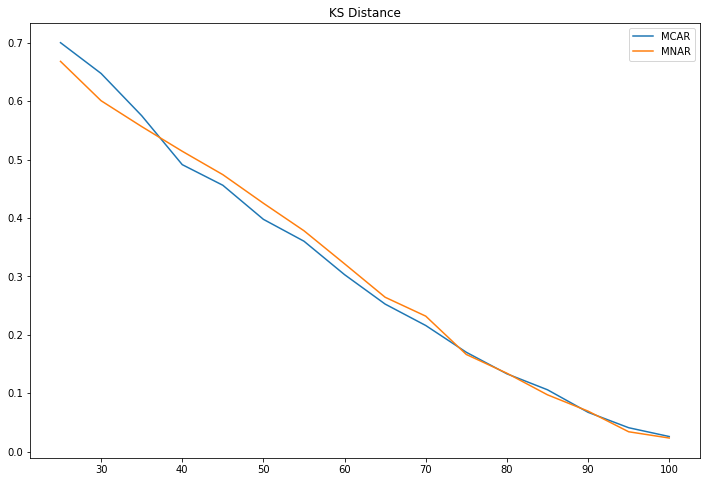

In [26]:
plt.figure(figsize=[12,8])
plt.plot([x/100 for x in range(25, 101, 5)], results['MCAR'][0], label='MCAR')
plt.plot([x/100 for x in range(25, 101, 5)], results['MNAR'][0], label='MNAR')
plt.legend()
plt.title('KS Distance')
plt.xlabel('Non-Missing Ratio')
plt.ylabel('Distance')
plt.show()

# Mixed Continuous and Categorical

Plot how the distributions are affected by each of the sparsity regimes

============= MCAR =============
Prop. NaNs:
x    0.4994
y    0.4972
dtype: float64


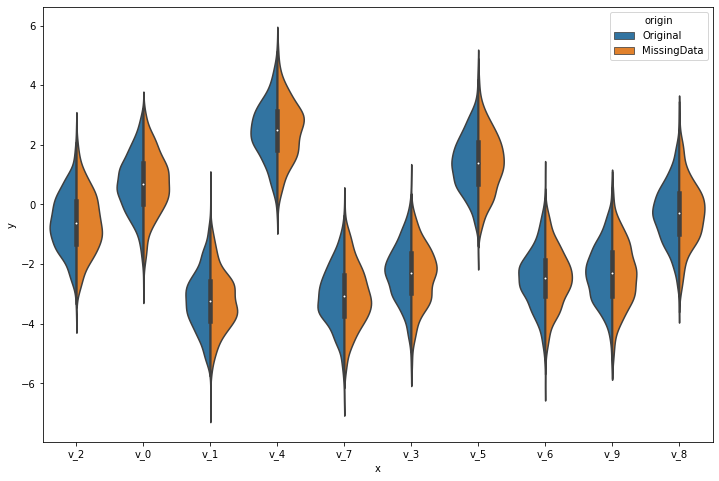

============= MAR =============
Prop. NaNs:
x    0.5000
y    0.5002
dtype: float64


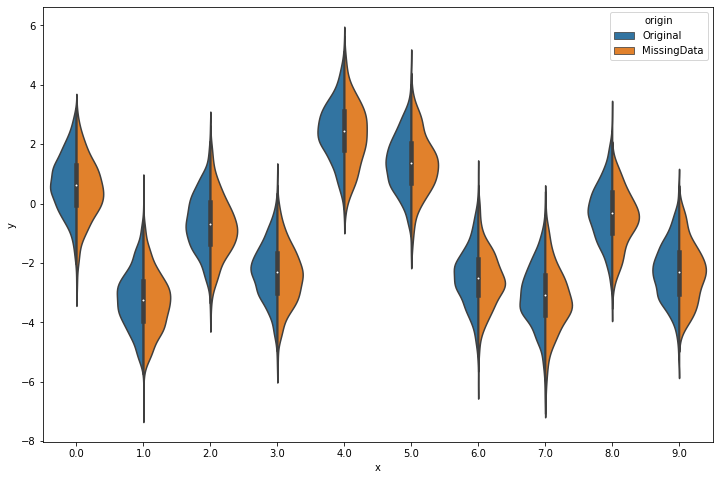

============= MNAR =============
Prop. NaNs:
x    0.4999
y    0.5000
dtype: float64


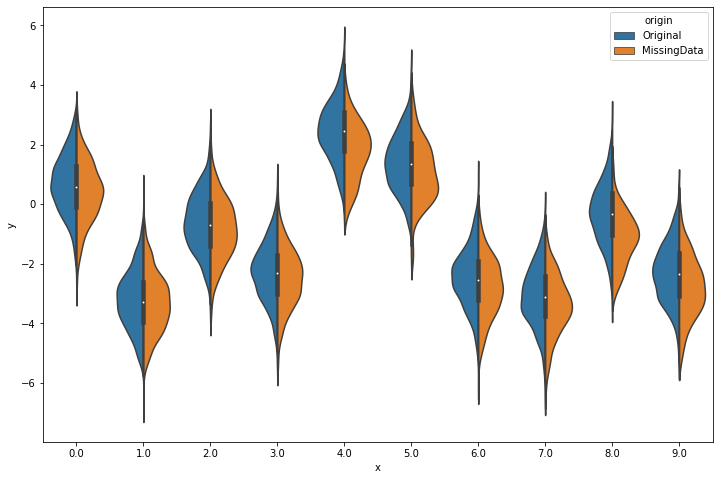

In [28]:
data = syn_dist.create_mixed_continuous_categorical(n_classes=10, size=10000, prior_sd=2.)
# data['x'] = data['x'].apply(lambda x: int(x[-1:])*2)

keep_ratio = 0.5
std_noise = 2.

# MCAR
print('============= MCAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MCAR')

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )

df_plot = pd.concat((data.assign(origin='Original') , data_missing.assign(origin='MissingData')))

plt.figure(figsize=[12,8])
sns.violinplot(x="x", y="y", hue='origin', split=True, data=df_plot)
plt.show()


# MAR
print('============= MAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )

df_plot = pd.concat((data.assign(origin='Original') , data_missing.assign(origin='MissingData')))

plt.figure(figsize=[12,8])
sns.violinplot(x="x", y="y", hue='origin', split=True, data=df_plot)
plt.show()


# MNAR
print('============= MNAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MNAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )

df_plot = pd.concat((data.assign(origin='Original') , data_missing.assign(origin='MissingData')))

plt.figure(figsize=[12,8])
sns.violinplot(x="x", y="y", hue='origin', split=True, data=df_plot)
plt.show()


For each of the regimes, evaluate different synthesized models for distinct proportions of Nans

Computed results for 75% NaNs for MCAR. Took 64.89s.
Computed results for 70% NaNs for MCAR. Took 80.38s.
Computed results for 65% NaNs for MCAR. Took 76.26s.
Computed results for 60% NaNs for MCAR. Took 88.16s.
Computed results for 55% NaNs for MCAR. Took 87.72s.
Computed results for 50% NaNs for MCAR. Took 79.72s.
Computed results for 45% NaNs for MCAR. Took 80.52s.
Computed results for 40% NaNs for MCAR. Took 64.31s.
Computed results for 35% NaNs for MCAR. Took 63.17s.
Computed results for 30% NaNs for MCAR. Took 62.84s.
Computed results for 25% NaNs for MCAR. Took 62.64s.
Computed results for 20% NaNs for MCAR. Took 62.31s.
Computed results for 15% NaNs for MCAR. Took 62.51s.
Computed results for 10% NaNs for MCAR. Took 62.57s.
Computed results for 5% NaNs for MCAR. Took 62.55s.
Computed results for 0% NaNs for MCAR. Took 72.81s.


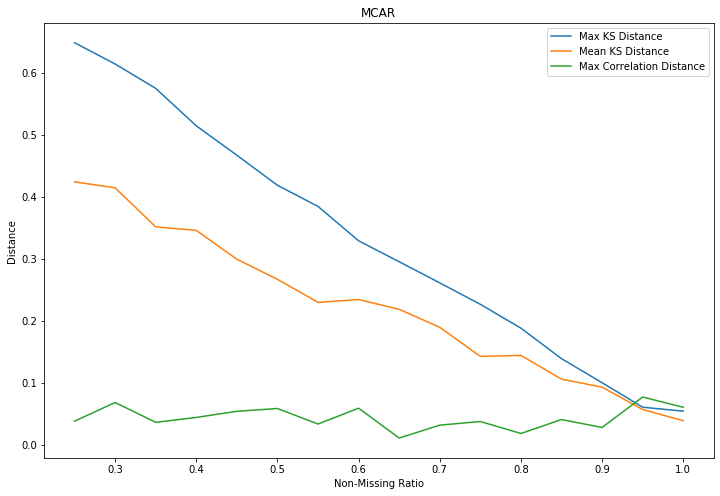

Computed results for 75% NaNs for MAR. Took 84.84s.
Computed results for 70% NaNs for MAR. Took 79.46s.
Computed results for 65% NaNs for MAR. Took 76.22s.
Computed results for 60% NaNs for MAR. Took 72.43s.
Computed results for 55% NaNs for MAR. Took 69.03s.
Computed results for 50% NaNs for MAR. Took 78.56s.
Computed results for 45% NaNs for MAR. Took 71.52s.
Computed results for 40% NaNs for MAR. Took 74.30s.
Computed results for 35% NaNs for MAR. Took 74.10s.
Computed results for 30% NaNs for MAR. Took 81.56s.
Computed results for 25% NaNs for MAR. Took 68.33s.
Computed results for 20% NaNs for MAR. Took 64.42s.
Computed results for 15% NaNs for MAR. Took 64.07s.
Computed results for 10% NaNs for MAR. Took 64.40s.
Computed results for 5% NaNs for MAR. Took 64.26s.
Computed results for 0% NaNs for MAR. Took 58.76s.


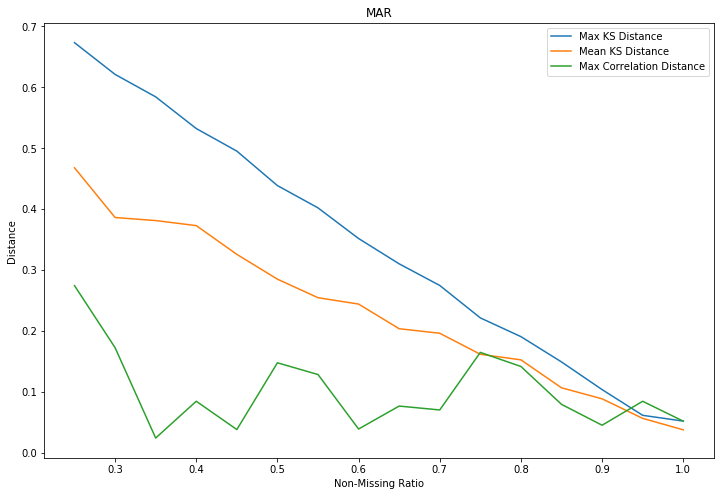

Computed results for 75% NaNs for MNAR. Took 80.01s.
Computed results for 70% NaNs for MNAR. Took 68.48s.
Computed results for 65% NaNs for MNAR. Took 68.37s.
Computed results for 60% NaNs for MNAR. Took 68.51s.
Computed results for 55% NaNs for MNAR. Took 70.90s.
Computed results for 50% NaNs for MNAR. Took 66.42s.
Computed results for 45% NaNs for MNAR. Took 69.75s.
Computed results for 40% NaNs for MNAR. Took 73.68s.
Computed results for 35% NaNs for MNAR. Took 68.88s.
Computed results for 30% NaNs for MNAR. Took 65.52s.
Computed results for 25% NaNs for MNAR. Took 65.18s.
Computed results for 20% NaNs for MNAR. Took 65.44s.
Computed results for 15% NaNs for MNAR. Took 76.40s.
Computed results for 10% NaNs for MNAR. Took 71.66s.
Computed results for 5% NaNs for MNAR. Took 73.07s.
Computed results for 0% NaNs for MNAR. Took 67.26s.


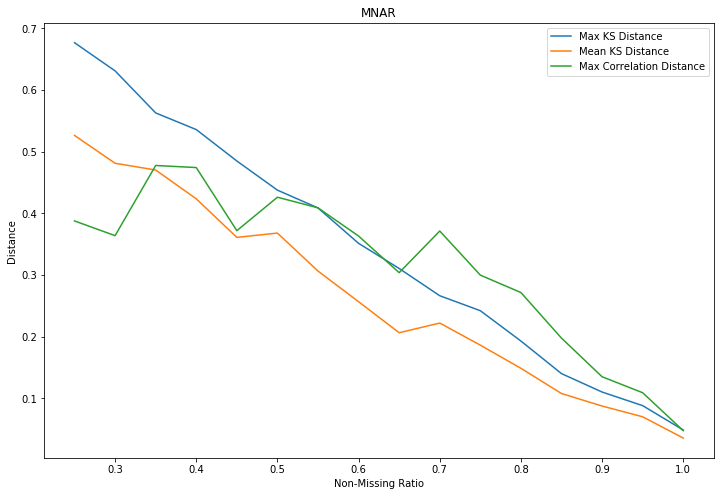

In [28]:
results = dict()
for mechanism in ['MCAR', 'MAR', 'MNAR']:
    results[mechanism] = synthesize_and_plot_results(
        data, mechanism, n_iter=2500, std_noise = 2., start=25, end=100, step=5, n_experiments=3
    )


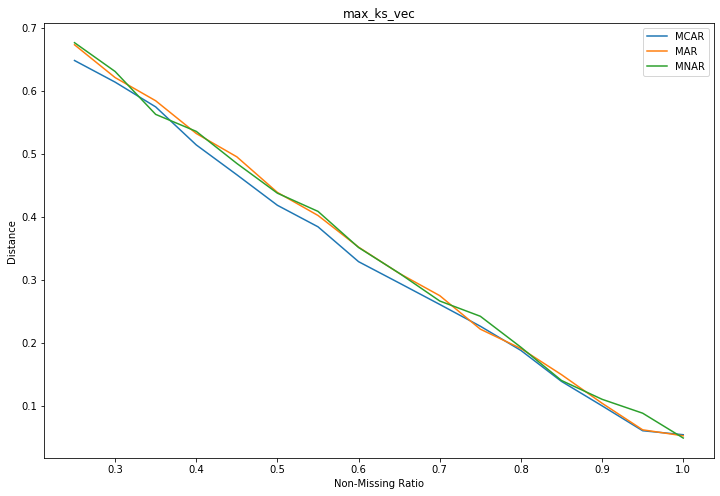

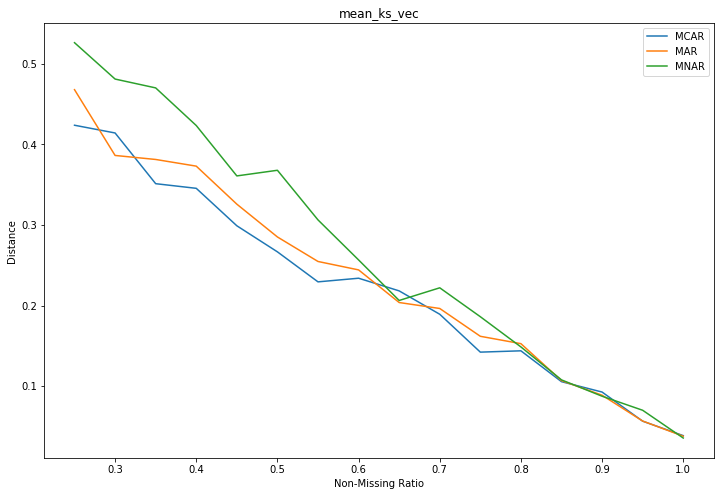

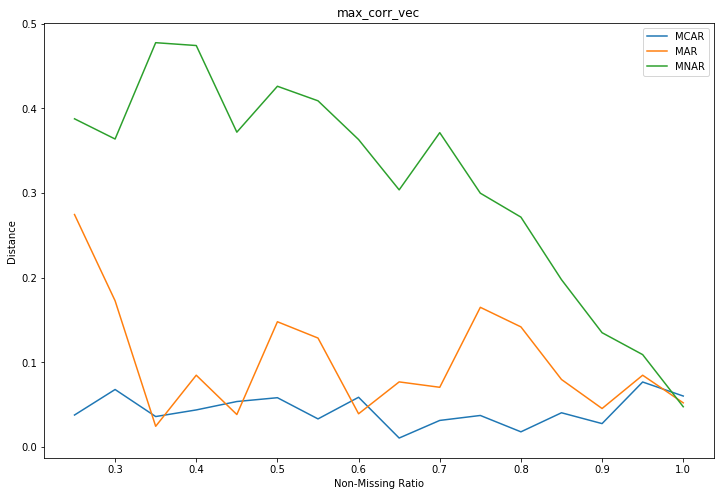

In [33]:
results_id = {
    'max_ks_vec': 0, 
    'mean_ks_vec': 1, 
    'max_corr_vec': 2
}

for k, v in results_id.items():
    plt.figure(figsize=[12,8])
    plt.plot([x/100 for x in range(25, 101, 5)], results['MCAR'][v], label='MCAR')
    plt.plot([x/100 for x in range(25, 101, 5)], results['MAR'][v], label='MAR')
    plt.plot([x/100 for x in range(25, 101, 5)], results['MNAR'][v], label='MNAR')
    plt.legend()
    plt.title(k)
    plt.xlabel('Non-Missing Ratio')
    plt.ylabel('Distance')
    plt.show()